In [1]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

# Manipulating the default plot size
#plt.rcParams['figure.figsize'] = 10, 12
plt.rcParams['figure.figsize']=25,18
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# Reading Dataset

In [6]:
df = pd.read_csv(r'C:/Users/VENGAT/Documents/DS/DSP_A/covid_19_india.csv')

In [10]:
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [8]:
df.rename(columns={'State/UnionTerritory':'State'}, inplace=True)

In [52]:
df.rename(columns={'Cured':'Recovered'}, inplace=True)

In [53]:
df.tail()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
14145,14146,2021-04-23,8:00 AM,Telengana,-,-,324840,1928,379494
14146,14147,2021-04-23,8:00 AM,Tripura,-,-,33345,394,34302
14147,14148,2021-04-23,8:00 AM,Uttarakhand,-,-,109058,1972,138010
14148,14149,2021-04-23,8:00 AM,Uttar Pradesh,-,-,706414,10541,976765
14149,14150,2021-04-23,8:00 AM,West Bengal,-,-,621340,10766,700904


# Data Analysis

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       14150 non-null  int64 
 1   Date                      14150 non-null  object
 2   Time                      14150 non-null  object
 3   State                     14150 non-null  object
 4   ConfirmedIndianNational   14150 non-null  object
 5   ConfirmedForeignNational  14150 non-null  object
 6   Recovered                 14150 non-null  int64 
 7   Deaths                    14150 non-null  int64 
 8   Confirmed                 14150 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 995.0+ KB


In [12]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State                       0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [55]:
df.describe()

,Sno,Recovered,Deaths,Confirmed
count,14150.000,14150.000,14150.000,14150.000
mean,7075.500,154012.596,2471.904,168157.861
std,4084.897,310533.535,6607.935,338406.325
min,1.000,0.000,0.000,0.000
25%,3538.250,1225.250,10.000,2355.250
50%,7075.500,16772.500,318.000,21025.500
75%,10612.750,178259.000,1915.000,205997.500
max,14150.000,3330747.000,62479.000,4094840.000


# Data Visualization

In [56]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
5,2020-02-04,3
6,2020-02-05,3
7,2020-02-06,3
8,2020-02-07,3
9,2020-02-08,3


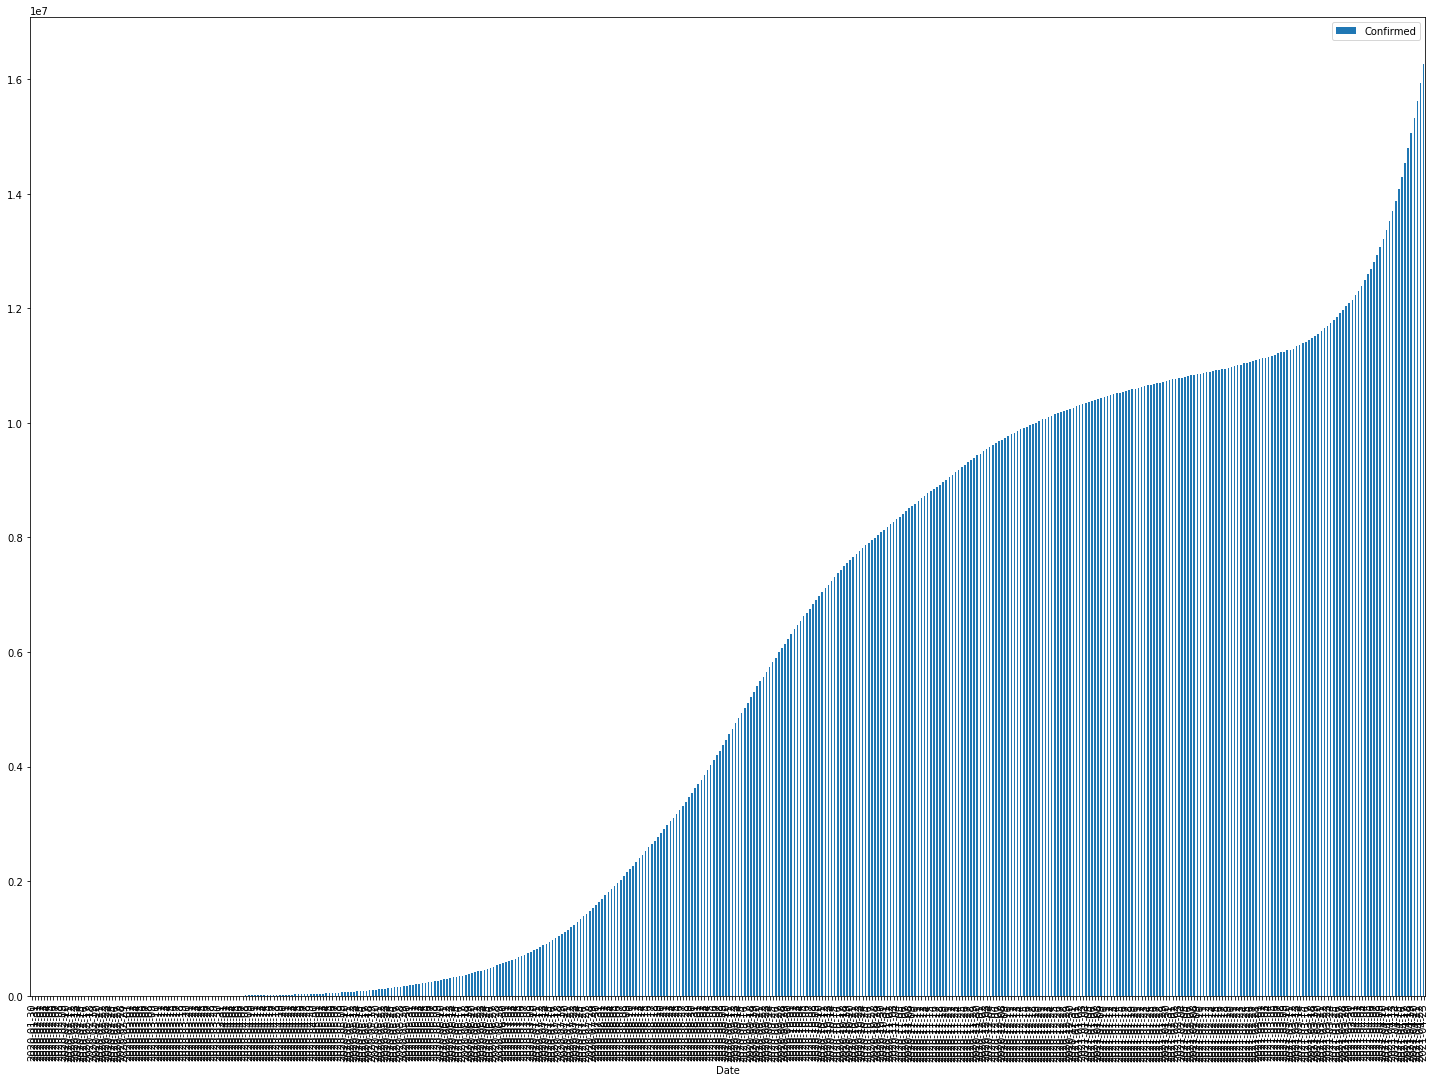

In [57]:
#Pandas vis
confirmed.plot(kind='bar',x='Date',y='Confirmed')
plt.show()

In [17]:
confirmed.iplot(kind='bar',x='Date',y='Confirmed',xTitle='Date',yTitle="Confirmed")

In [58]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths

,Date,Deaths
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
5,2020-02-04,0
6,2020-02-05,0
7,2020-02-06,0
8,2020-02-07,0
9,2020-02-08,0


In [19]:
deaths.iplot(kind='bar',x='Date',y='Deaths',xTitle='Date',yTitle="Deaths")

In [59]:
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
recovered

,Date,Recovered
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
5,2020-02-04,0
6,2020-02-05,0
7,2020-02-06,0
8,2020-02-07,0
9,2020-02-08,0


In [60]:
recovered.iplot(kind='bar',x='Date',y='Recovered',xTitle='Date',yTitle="Recovered")

# Prediction using FB Prophet

In [61]:
from fbprophet import Prophet

In [62]:
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [63]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [64]:
confirmed.tail(10)

,Date,Confirmed
440,2021-04-14,13873825
441,2021-04-15,14074564
442,2021-04-16,14291917
443,2021-04-17,14526609
444,2021-04-18,14788109
445,2021-04-19,15061919
446,2021-04-20,15321089
447,2021-04-21,15616130
448,2021-04-22,15930965
449,2021-04-23,16263695


In [65]:
deaths.tail(10)

,Date,Deaths
440,2021-04-14,172085
441,2021-04-15,173123
442,2021-04-16,174308
443,2021-04-17,175649
444,2021-04-18,177150
445,2021-04-19,178769
446,2021-04-20,180530
447,2021-04-21,182553
448,2021-04-22,184657
449,2021-04-23,186920


In [66]:
recovered.tail(10)

,Date,Recovered
440,2021-04-14,12336036
441,2021-04-15,12429564
442,2021-04-16,12547866
443,2021-04-17,12671220
444,2021-04-18,12809643
445,2021-04-19,12953821
446,2021-04-20,13108582
447,2021-04-21,13276039
448,2021-04-22,13454880
449,2021-04-23,13648159


In [67]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [68]:
confirmed.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [69]:
confirmed.tail()

,ds,y
445,2021-04-19,15061919
446,2021-04-20,15321089
447,2021-04-21,15616130
448,2021-04-22,15930965
449,2021-04-23,16263695



## 4.1 Forecasting Confirmed NCOVID-19 Cases India with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [70]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [71]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=131)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
future.tail(140)

,ds
441,2021-04-15
442,2021-04-16
443,2021-04-17
444,2021-04-18
445,2021-04-19
446,2021-04-20
447,2021-04-21
448,2021-04-22
449,2021-04-23
450,2021-04-24


In [73]:
# predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
441,2021-04-15,13255156.803,12593346.011,13902140.885
442,2021-04-16,13300498.369,12656221.890,13920382.148
443,2021-04-17,13300475.209,12645051.855,13939623.040
444,2021-04-18,13342736.516,12613645.198,13977146.181
445,2021-04-19,13384226.261,12724349.534,14038344.159
446,2021-04-20,13421066.926,12731335.499,14168727.477
447,2021-04-21,13462411.264,12798087.084,14121852.486
448,2021-04-22,13506778.959,12831033.543,14204296.697
449,2021-04-23,13552120.526,12906840.760,14185840.700
450,2021-04-24,13552097.366,12858706.271,14210826.046


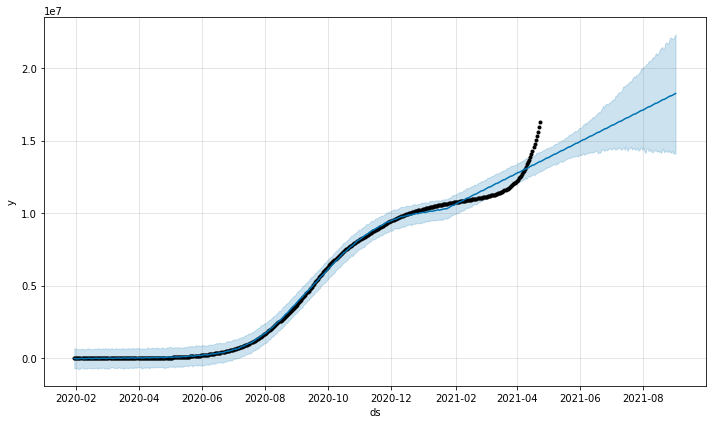

In [76]:
confirmed_forecast_plot = m.plot(forecast)

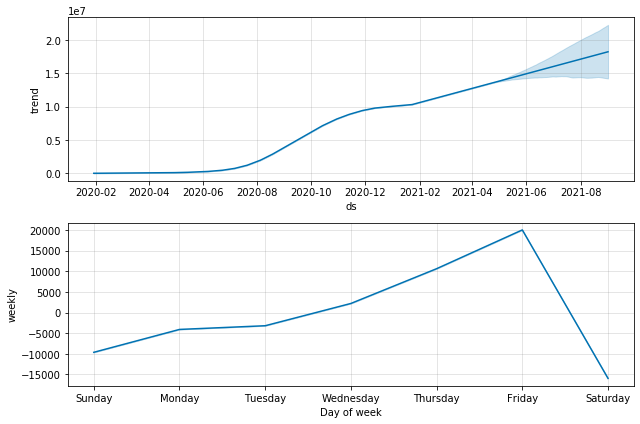

In [77]:
confirmed_forecast_plot =m.plot_components(forecast)

In [78]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [79]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
576,2021-08-28
577,2021-08-29
578,2021-08-30
579,2021-08-31
580,2021-09-01


In [80]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
441,2021-04-15,169461.076,165889.743,172961.352
442,2021-04-16,169748.291,166319.057,173308.148
443,2021-04-17,169770.994,166261.331,173217.857
444,2021-04-18,170021.334,166691.372,173586.114
445,2021-04-19,170250.378,166429.968,173944.912
446,2021-04-20,170461.433,166978.243,173736.811
447,2021-04-21,170745.846,167067.403,174085.964
448,2021-04-22,171024.759,167446.524,174726.658
449,2021-04-23,171311.974,167890.042,174873.920
450,2021-04-24,171334.677,167911.019,175000.925


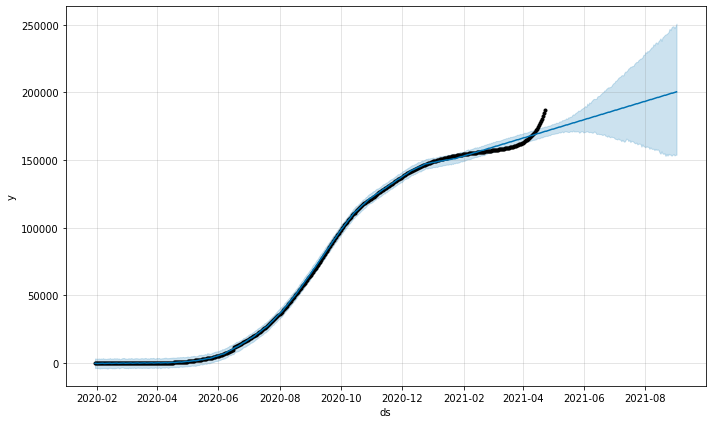

In [44]:
deaths_forecast_plot = m.plot(forecast)

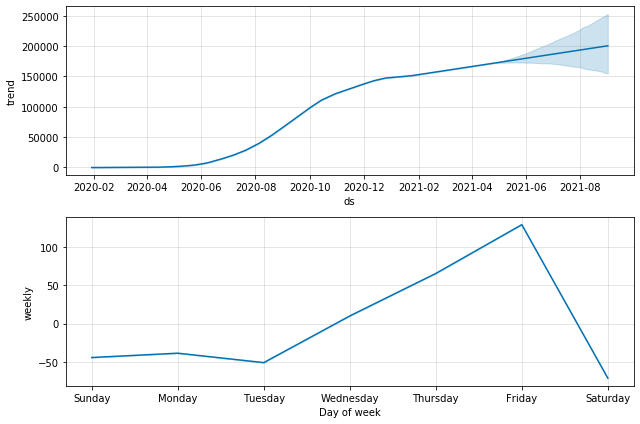

In [81]:
deaths_forecast_plot = m.plot_components(forecast)

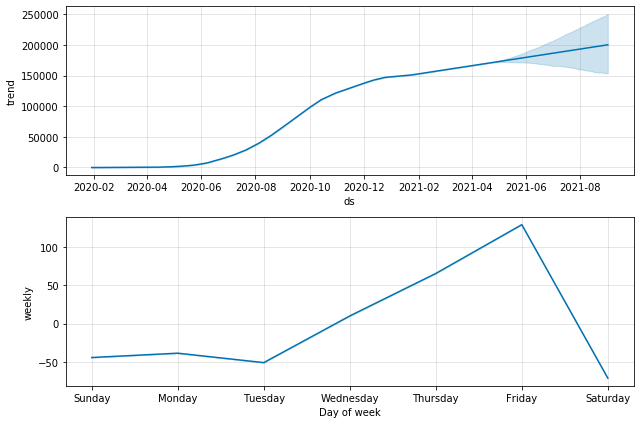

In [46]:
deaths_forecast_plot = m.plot_components(forecast)

## Forecasting India's Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [47]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [48]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
576,2021-08-28
577,2021-08-29
578,2021-08-30
579,2021-08-31
580,2021-09-01


In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
441,2021-04-15,12095946.766,11811495.326,12406140.379
442,2021-04-16,12124531.570,11826990.041,12443366.132
443,2021-04-17,12130525.275,11797568.460,12453913.459
444,2021-04-18,12158027.085,11863015.191,12459221.023
445,2021-04-19,12183516.121,11854911.809,12500708.530
446,2021-04-20,12210793.032,11884193.696,12519138.921
447,2021-04-21,12237334.414,11930609.177,12527892.280
448,2021-04-22,12264508.293,11964736.374,12582863.430
449,2021-04-23,12293093.097,11987560.675,12602758.237
450,2021-04-24,12299086.801,12003686.472,12622978.928


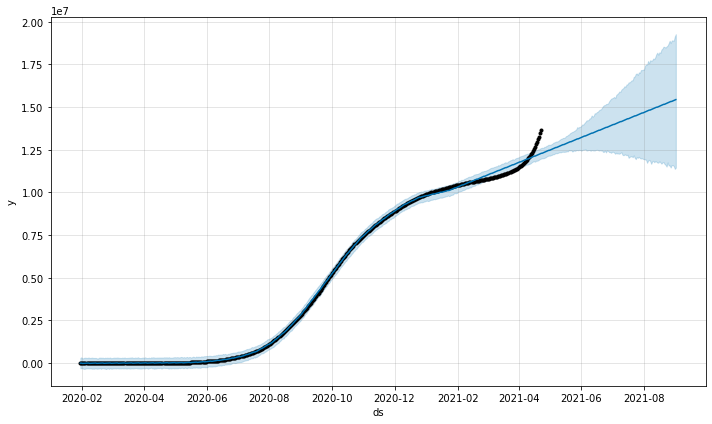

In [50]:
recovered_forecast_plot = m.plot(forecast)

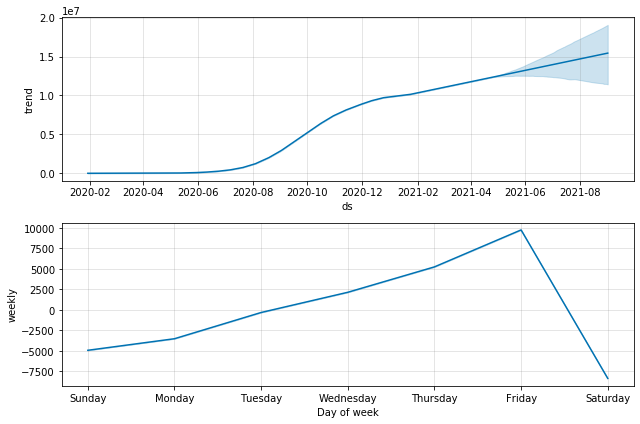

In [51]:
recovered_forecast_plot = m.plot_components(forecast)

# **Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/covid19-in-india